<a href="https://colab.research.google.com/github/geeorgebixleer/fitoplancton_acapulco/blob/main/Tesis_Acapulco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIVERSIDAD DE FITOPLANCTON - ACAPULCO**

## 1.Introducción:


En el presente trabajo se estudió la diversidad y abundancia del fitoplancton
perteneciente a Acapulco, Guerrero, a través de cinco estaciones correspondientes
a un transecto perpendicular que va de la costa al océano, así como ubicar la
distribución de los grupos dominantes.

## 2.Justificación:

Ubicar las zonas de alta productividad primaria en estos ecosistemas, conocer las especies locales y su distribución, ayuda a establecer sitios donde pueden
presentarse eventos de proliferaciones masivas, las cuales podrían resultar tóxicas
o nocivas para los diferentes estratos de las comunidades marinas y el hombre.

## 3.Objetivo General:


Estudiar la diversidad, abundancia y distribución del fitoplancton marino y oceánico de Acapulco, Guerrero.

### 3.1. Objetivos Específicos:

1. Determinar la diversidad de taxones.
2. Identificar las especies dominantes en las comunidades.
3. Relacionar la distribución espacial y vertical de los grupos dominantes con
las variables fisicoquímicas y la clorofila-a.

1. deteminar diversidad de taxones: df.unique
por comunidad, segmento y transecto

2. especies dominantes:
calcular la abundancia - 1000,0000 ? - cuales sp?
ordenar ascendentemente [conteo_1] + [conteo_2] / 2
por profundidad, y por segmento y por transecto

3. abundancia-presencia / clorofila-a y fact fisicoq



## 4.Trabajo De Campo:

En abril del 2017 se llevó a cabo una expedición de crucero oceanográfico
denominada “MareaR IX” a bordo del buque oceanográfico “El Puma”. Se muestreó
un transecto perpendicular a la costa de Acapulco, el cual consta de cinco
estaciones que van desde la costa al océano (0 – 78 km) (Figura 1 y 2). El transecto
está comprendido por las estaciones: 42 o Costera (C) [16.81635; -99.8723667], 44
o Semicostera (SC) [16.6551667; -99.9316833], 45 o de Transición (T) [16.4978167;
-99.9910167], 46 o Semioceánica (SO) [16.34035; -100.0487] y la 46a u Oceánica
(O) [16.16; -100.13]. Los criterios antes mencionados se establecieron de acuerdo
a la cercanía y/o lejanía de las localidades respecto de la costa-océano, en la cual,
la zona de Transición es aquella que se encuentra en la parte intermedia del
transecto.

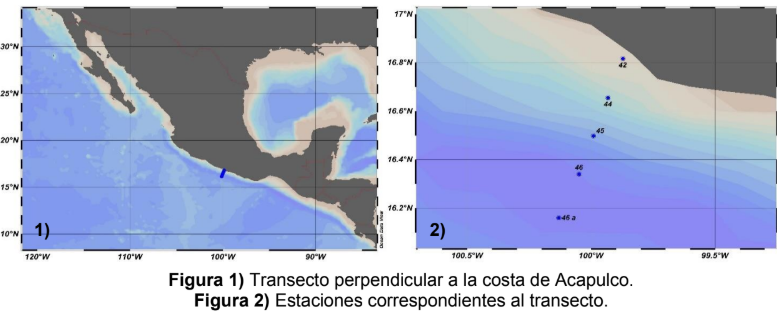

## 5.Configurando el ambiente:

In [ ]:
!git config --global user.name "geeorgebixleer"
!git config --global user.mail "geeorge_bixleer@hotmail.com"
!git config --global user.password "Dr@pion1328#"

In [ ]:
token = ''
username = ''
repo = ''

- A continuación se cargan e importan las liberías necesarias.
- Se accede al dataset y se genera un ciclo para obtener un solo dataframe de las hojas provenientes de excel.

In [ ]:
!pip install openpyxl # librería para leer y escribir archivos .xlsx
!pip install rapidfuzz # Librería para comparar textos y corregir errores ortográficos automáticamente
!pip install -q scikit-bio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rapidfuzz import process, fuzz
from skbio import Table
from skbio.diversity.alpha import sobs
from skbio.diversity import alpha_diversity
import skbio

In [ ]:
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', None)  # Elimina el límite de ancho
pd.set_option('display.max_colwidth', None) # Asegura que el contenido de las columnas se muestre completo

- Acceso a archivos en OneDrive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Importando dataset de variables fisicoquímicas:

In [ ]:
route1 = ('/content/drive/MyDrive/Tesis_Acapulco/Datos/Acapulco - VFQ Marear IX.csv') #ruta del archivo csv
route1

'/content/drive/MyDrive/Tesis_Acapulco/Datos/Acapulco - VFQ Marear IX.csv'

In [ ]:
route1

'/content/drive/MyDrive/Tesis_Acapulco/Datos/Acapulco - VFQ Marear IX.csv'

In [ ]:
df_vfq = pd.read_csv(route1)
df_vfq.head()

,Cruise,Station,yyyy-mm-ddThh:mm,Type,Latitude,Longitude,Depth[m],Density [Kg/m^3],Salinity [UPS],Temperature [degrees_C],Oxygen [mg/L],% Sat Oxi,Fluorescence [mg/m^3]
0,CTDMAREAR IX,42,2017-04-24T12:48,c,16.81635,-99.872367,5.01,1022.43,34.61,27.06,6.68,101.93,1.12
1,CTDMAREAR IX,42,2017-04-24T12:48,c,16.81635,-99.872367,10.00,1022.59,34.62,26.64,6.65,100.72,1.34
2,CTDMAREAR IX,42,2017-04-24T12:48,c,16.81635,-99.872367,18.02,1022.88,34.59,25.76,6.47,96.54,2.01
3,CTDMAREAR IX,42,2017-04-24T12:48,c,16.81635,-99.872367,24.01,1023.25,34.58,24.59,5.34,78.16,1.98
4,CTDMAREAR IX,42,2017-04-24T12:48,c,16.81635,-99.872367,28.01,1023.44,34.59,24.03,4.93,71.39,1.40


- Importando dataset de abundancia de especies:

In [ ]:
route2 = ('/content/drive/MyDrive/Tesis_Acapulco/Conteo_Acapulco_07-11-2025.xlsx')  # ruta del archivo xlsx
route2

'/content/drive/MyDrive/Tesis_Acapulco/Conteo_Acapulco_07-11-2025.xlsx'

In [ ]:
hojas = ["E42", "E44", "E45", "E46", "E46A"] # array de hojas del archivo xlsx
columnas = ["estacion", "profundidad", "especie", "conteo_1", "conteo_2"] # array de columnas deseadas en df
xlsx_full = [] # array para almacenar c/array del ciclo for (hojas)

for hoja in hojas:
    xlsx = pd.read_excel(route2, sheet_name=hoja, usecols=columnas) # genera y archivo por hoja del archivo xlsx (se sobreescribe c/ciclo)
    xlsx_sheets = xlsx.loc[:, columnas] # descarta columnas duplicadas
    xlsx_full.append(xlsx_sheets) # almacena c/array generado por c/ciclo for

df = pd.concat(xlsx_full, ignore_index=True) # combina todos los arrays en un df

In [ ]:
df.sample(10)

,estacion,profundidad,especie,conteo_1,conteo_2
17,42,10,Dictyocha fibula,1.0,1.0
40,42,18,Rhizosolenia imbricata,0.0,1.0
397,46A,50,Octactis octanaria,0.0,1.0
377,46A,18,Hemidiscus cuneiformis,0.0,1.0
390,46A,50,Asteromphalus aracna,3.0,0.0
145,44,30,Thalassiosira leptopus,0.0,1.0
19,42,10,Gephyrocapsa oceanica,70.0,43.0
22,42,10,Planktoniella muriformis,0.0,1.0
52,42,24,Dictyocha calida,0.0,2.0
89,44,5,Prorocentrum gracile,4.0,4.0


## 6.Tratamiento y Transformación de Datos


- Eliminamos columnas.
- Renmobramos valores en la columna 'estacion'.
- Renombramos columnas.


In [ ]:
df_vfq = df_vfq.drop(columns=["Cruise", "yyyy-mm-ddThh:mm", "Type", "Density [Kg/m^3]", "% Sat Oxi"])


In [ ]:
df_vfq['Station'] = df_vfq['Station'].str.replace('46 a', '46a')
df_vfq

,Station,Latitude,Longitude,Depth[m],Salinity [UPS],Temperature [degrees_C],Oxygen [mg/L],Fluorescence [mg/m^3]
0,42,16.816350,-99.872367,5.01,34.61,27.06,6.68,1.12
1,42,16.816350,-99.872367,10.00,34.62,26.64,6.65,1.34
2,42,16.816350,-99.872367,18.02,34.59,25.76,6.47,2.01
3,42,16.816350,-99.872367,24.01,34.58,24.59,5.34,1.98
4,42,16.816350,-99.872367,28.01,34.59,24.03,4.93,1.40
5,44,16.655167,-99.931683,5.00,34.70,28.34,6.47,0.08
6,44,16.655167,-99.931683,20.02,34.56,25.63,6.59,0.60
7,44,16.655167,-99.931683,30.02,34.56,22.79,5.38,3.63
8,44,16.655167,-99.931683,50.00,34.71,18.01,0.98,0.73
9,44,16.655167,-99.931683,75.03,34.83,15.07,0.17,0.27


In [ ]:
df_vfq.columns

Index(['Station', 'Latitude ', 'Longitude ', 'Depth[m]', 'Salinity [UPS]',
       'Temperature [degrees_C]', 'Oxygen [mg/L]', 'Fluorescence [mg/m^3]'],
      dtype='object')

In [ ]:
df_vfq.rename(columns={
    'Station': 'estacion',
    'Latitude ': 'latitud',
    'Longitude ': 'longitud',
    'Depth[m]': 'profundidad (m)',
    'Salinity [UPS]': 'salinidad (UPS)',
    'Temperature [degrees_C]': 'temperatura (grados_c)',
    'Oxygen [mg/L]': 'oxigeno (mg/L)',
    'Fluorescence [mg/m^3]': 'fluorescencia (mg/m^3)'},
              inplace=True)

df_vfq

,estacion,latitud,longitud,profundidad (m),salinidad (UPS),temperatura (grados_c),oxigeno (mg/L),fluorescencia (mg/m^3)
0,42,16.816350,-99.872367,5.01,34.61,27.06,6.68,1.12
1,42,16.816350,-99.872367,10.00,34.62,26.64,6.65,1.34
2,42,16.816350,-99.872367,18.02,34.59,25.76,6.47,2.01
3,42,16.816350,-99.872367,24.01,34.58,24.59,5.34,1.98
4,42,16.816350,-99.872367,28.01,34.59,24.03,4.93,1.40
5,44,16.655167,-99.931683,5.00,34.70,28.34,6.47,0.08
6,44,16.655167,-99.931683,20.02,34.56,25.63,6.59,0.60
7,44,16.655167,-99.931683,30.02,34.56,22.79,5.38,3.63
8,44,16.655167,-99.931683,50.00,34.71,18.01,0.98,0.73
9,44,16.655167,-99.931683,75.03,34.83,15.07,0.17,0.27


In [ ]:
df_vfq["profundidad (m)"] = np.floor(df_vfq["profundidad (m)"]).astype(int)  # redondeando a entero; si el decimal > .5, o si es <.5
df_vfq

,estacion,latitud,longitud,profundidad (m),salinidad (UPS),temperatura (grados_c),oxigeno (mg/L),fluorescencia (mg/m^3)
0,42,16.816350,-99.872367,5,34.61,27.06,6.68,1.12
1,42,16.816350,-99.872367,10,34.62,26.64,6.65,1.34
2,42,16.816350,-99.872367,18,34.59,25.76,6.47,2.01
3,42,16.816350,-99.872367,24,34.58,24.59,5.34,1.98
4,42,16.816350,-99.872367,28,34.59,24.03,4.93,1.40
5,44,16.655167,-99.931683,5,34.70,28.34,6.47,0.08
6,44,16.655167,-99.931683,20,34.56,25.63,6.59,0.60
7,44,16.655167,-99.931683,30,34.56,22.79,5.38,3.63
8,44,16.655167,-99.931683,50,34.71,18.01,0.98,0.73
9,44,16.655167,-99.931683,75,34.83,15.07,0.17,0.27


- Df: dataset compuesto por 5 columnas y 424 registros.

In [ ]:
df.shape # total de registros y columnas

(424, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   estacion     424 non-null    object 
 1   profundidad  424 non-null    int64  
 2   especie      419 non-null    object 
 3   conteo_1     418 non-null    float64
 4   conteo_2     419 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 16.7+ KB


###6.1. Limpiando valores nulos

Los valores nulos se encuentran:
- 5 en 'especie'.
- 6 en 'conteo_1'.
- 5 en 'conteo_2'.

In [ ]:
df.isnull().sum() # total de valores nulos

,0
estacion,0
profundidad,0
especie,5
conteo_1,6
conteo_2,5


Filtramos para verificar los registros con datos nulos:

In [ ]:
df_nulos = df[df.isnull().any(axis=1)] # df de registros con valores nulos
df_nulos

,estacion,profundidad,especie,conteo_1,conteo_2
16,42,10,NaN,NaN,NaN
37,42,18,Octanaria octactis,NaN,1.0
65,42,28,NaN,NaN,NaN
81,44,5,NaN,NaN,NaN
167,44,75,NaN,NaN,NaN
301,46,30,NaN,NaN,NaN


Asignamos el mismo valor de "conteo_2" a "conteo_1" en el registro 38 para poder promediar las celúlas contadas.

In [ ]:
df.loc[37, "conteo_1"] = df.loc[37, "conteo_2"] # asignando valor faltante a registro
df.loc[37]

,37
estacion,42
profundidad,18
especie,Octanaria octactis
conteo_1,1.0
conteo_2,1.0


Eliminamos 5 registros con valores nulos, dado que es imposible determinar a que 'especie' pertenecen.
- Pasamos de tener 424 registros a 419.


In [ ]:
df = df.dropna()
df.shape

(419, 5)

###6.2.Listado preliminar de especies

- Al imprimir esta lista, se observa que hay valores repetidos y erroneos.
- Se tienen 183 especies.

In [ ]:
sorted(df["especie"].unique())

['Achnanthes lanceolata bimaculata',
 'Actiniscus pentasterias',
 'Actinocyclus curvatulus',
 'Actinoptychus senarius',
 'Alveosphaera bimurata',
 'Alveus marinus',
 'Amphora amphibia',
 'Amphora crasa',
 'Amphora proteus',
 'Amphora sp',
 'Amphora turgida',
 'Asteromphalus aracna',
 'Asteromphalus flabellatus',
 'Asteromphalus heptactis',
 'Asteromphalus petersonii',
 'Asteromphalus sarcophagus',
 'Astiniscus pentasterias',
 'Aszpeitia nodulifera',
 'Azpeitia nodulifera',
 'Bacillaria paxillifer',
 'Biddulphia obtusa',
 'Braaurodosphaera bigelowi',
 'Braaurodosphaera bigelowii',
 'Calcidiscus leptoporus',
 'Ceratolithus cristatus',
 'Chaetoceros affinis',
 'Coronosphaera mediterranea',
 'Coscinodiscus gravida',
 'Coscinodiscus latimarginatus',
 'Coscinodiscus nodulifer',
 'Coscinodiscus radiatus',
 'Coscinodiscus wailesii',
 'Coscinodiscus wittianus',
 'Cyclotella glabrisucula',
 'Cyclotella glabriuscula',
 'Cyclotella kuetzingiana',
 'Cyclotella platenophora',
 'Cyclotella sp',
 'Dic

In [ ]:
print(len(df['especie'].unique()))

183


### 6.3. Mapeando y estandarizando nombres de especies

- Se implementaron funciones para mapear y corregir nombres de especies con errores tipográficos y/o duplicados.

In [ ]:
nombres_correctos = [ # array para corregir 'especie' buscando similitud
    "Azpeitia nodulifera",
    "Actiniscus pentasterias",
    "Biddulphia alternans",
    "Braarudosphaera bigelowii",
    "Cyclotella glabriuscula",
    "Dictyocha calida",
    "Dictyocha octanaria",
    "Dinophysis caudata",
    "Diploneis sp 1",
    "Emiliania huxleyi",
    "Gephyrocapsa ericsonii",
    "Nitzschia acicularis",
    "Nitzschia amphibia",
    "Nitzschia angustata",
    "Nitzschia bicapitata",
    "Octactis octonaria",
    "Ornithocercus quadratus",
    "Oxytoxum constrictum",
    "Oxytoxum scolopax",
    "Oxytoxum tessellatum",
    "Peridinial sp1",
    "Peridinial sp2",
    "Peridinial sp3",
    "Planktoniella sol",
    "Podolampas spinifera",
    "Proboscia alata",
    "Prorocentrum gracile",
    "Rhabdosphaera clavigera",
    "Rhizosolenia imbricata",
    "Roperia tessellata",
    "Scrippsiella sp",
    "Surirella fastuosa",
    "Thalassiosira eccentrica",
    "Thalassionema frauenfeldii",
    "Thalassiosira leptopus",
    "Thalassionema nitzschioides",
    "Thalassiosira oestrupii",
    "Thalassiosira simonsenii",
    "Triceratium cinnamomeum",
    "Tripos furca",
    "Tripos horridus",
    "Tripos macroceros",
    "Umbilicosphaera sibogae",
    "Umbillicosphaera hulburtiana"
    ]

correccion_manual = { # Diccionario para corregir 'especie' manualmente
    "dictyocha octanaria": "Octactis octonaria",
    "octanaria octactis": "Octactis octonaria",
    "octonaria octactis": "Octactis octonaria",
    "roperia tesalata": "Roperia tessellata",
    "triceratium alternans": "Biddulphia alternans",
    "tripos furca": "Tripos tripos",
    "tripos pengatonum": "Tripos pentagonus",
    "triceratium cinamonium": "Triceratium cinnamomeum",
}

In [ ]:
# Función para corregir 'especie' usando coincidencia difusa (palabras similiares)
def corregir_fuzz(nombre, lista_correcta, umbral=90):  # umbral: nivel mínimo de similitud (de 0 a 100)
    if pd.isna(nombre):  # ignora si el valor nulo (NaN)
        return nombre
    resultado = process.extractOne(nombre, lista_correcta, scorer=fuzz.token_sort_ratio) # scorer=fuzz.token_sort_ratio : compara la similitud entre cadenas, ignorando el orden de las palabras
    if resultado and resultado[1] >= umbral: # si la similitud >= a umbral, corrige
        return resultado[0]  # nombre corregido
    return nombre  # si no encuentra coincidencia suficientemente buena

# Función para corregir 'especie' manualmente
def corregir_manual(nombre, diccionario):
    if pd.isna(nombre): # ignora si el valor nulo (NaN)
        return nombre
    nombre_limpio = nombre.lower().strip()
    return diccionario.get(nombre_limpio, nombre)

In [ ]:
df['especie'] = df['especie'].apply(lambda x: corregir_fuzz(x, nombres_correctos)) # mapear correcciones buscando similitud entre palabras
df['especie'] = df['especie'].apply(lambda x: corregir_manual(x, correccion_manual)) # mapear correcciones manualmente

### 6.4. Listado filtrado

- Imprimimos el listado final con especies únicas.
- Previo a la depuración, teniamos:
    183 especies.
- Para posteriormente tener:
    147 especies.

In [ ]:
sorted(df["especie"].unique())

['Achnanthes lanceolata bimaculata',
 'Actiniscus pentasterias',
 'Actinocyclus curvatulus',
 'Actinoptychus senarius',
 'Alveosphaera bimurata',
 'Alveus marinus',
 'Amphora amphibia',
 'Amphora crasa',
 'Amphora proteus',
 'Amphora sp',
 'Amphora turgida',
 'Asteromphalus aracna',
 'Asteromphalus flabellatus',
 'Asteromphalus heptactis',
 'Asteromphalus petersonii',
 'Asteromphalus sarcophagus',
 'Azpeitia nodulifera',
 'Bacillaria paxillifer',
 'Biddulphia alternans',
 'Biddulphia obtusa',
 'Braarudosphaera bigelowii',
 'Calcidiscus leptoporus',
 'Ceratolithus cristatus',
 'Chaetoceros affinis',
 'Coronosphaera mediterranea',
 'Coscinodiscus gravida',
 'Coscinodiscus latimarginatus',
 'Coscinodiscus nodulifer',
 'Coscinodiscus radiatus',
 'Coscinodiscus wailesii',
 'Coscinodiscus wittianus',
 'Cyclotella glabriuscula',
 'Cyclotella kuetzingiana',
 'Cyclotella platenophora',
 'Cyclotella sp',
 'Dictyocha calida',
 'Dictyocha californica',
 'Dictyocha crux',
 'Dictyocha fibula',
 'Dic

In [ ]:
len(df["especie"].unique())

147

## 7.Metodologia:

### 7.1. Conteo Promedio

- Generando la columna **conteo_promedio** a partir de "conteo_1" y "conteo_2".
- Descartamos "conteo_1" y "conteo_2" para conservar "conteo_promedio".

In [ ]:
df["conteo_promedio"] = df[["conteo_1", "conteo_2"]].mean(axis=1) # nueva col, promedio de conteo_1 y conteo_2; indica que es por fila: axis=1
df = df.drop(columns=["conteo_1", "conteo_2"])
df.sample(5)

,estacion,profundidad,especie,conteo_promedio
202,45,10,Asteromphalus sarcophagus,3.0
187,45,5,Nitzschia microcephala,1.0
183,45,5,Gephyrocapsa oceanica,13.5
137,44,30,Proboscia alata,0.5
396,46A,50,Nitzschia lorenziana,0.5


In [ ]:
df['especie'].unique()

array(['Dictyocha californica', 'Dictyocha fibula', 'Dinophysis caudata',
       'Gephyrocapsa oceanica', 'Helicosphaera carteri',
       'Pleurosigma elongatum', 'Prorocentrum gracile',
       'Prorocentrum micans', 'Rhizosolenia imbricata',
       'Surirella fastuosa', 'Thalassionema nitzschioides',
       'Tripos tripos', 'Tripos macroceros', 'Tripos praelongum',
       'Amphora sp', 'Calcidiscus leptoporus', 'Diploeneis sp1',
       'Neodelphineis pelagica', 'Planktoniella sol',
       'Planktoniella muriformis', 'Tripos candelabrum',
       'Tripos deflexum', 'Actiniscus pentasterias',
       'Cyclotella glabriuscula', 'Dictyocha calida',
       'Dictyocha messanensis', 'Octactis octonaria',
       'Protoperidinium oceanicum', 'Thalassiosira angulata',
       'Thalassiosira leptopus', 'Thalassiosira oestrupii',
       'Thalassiosira pacifica', 'Thalassiosira tenera', 'Amphora crasa',
       'Amphora proteus', 'Coscinodiscus radiatus', 'Lioloma pacificum',
       'Navicula crebra',

### 7.2.Abundancia celular por Litro de agua

- Generamos la columna **abundancia**, a partir de la columna **conteo_promedio**, para lo cuál, usamos la formula para calcular la abundancia celular en muestras de filtro.
- La columna **abundancia** permite determinar la cantidad de células por litro de agua.
- Eliminamos la columna "conteo_promedio".

    Fórmula para calcular la abundancia, dónde:

    - CD = células por litro de agua (L).
    - A = Área del Filtro (mm²).
    - N = Número de células contadas (células).
    - a = Área analizada (mm²).
    - v = Volumen de agua filtrada (L).

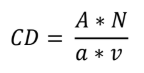

In [ ]:
A = 1450
a =3.1887
v = 3

df["abundancia"] = (A * df["conteo_promedio"]) / (a * v) # generando columna "abundancia"
df["abundancia"] = np.where(df["abundancia"] % 1 > 0.5, np.ceil(df["abundancia"]), np.floor(df["abundancia"])).astype(int)  # redondeando a entero; si el decimal > .5, o si es <.5
df = df.drop(columns=["conteo_promedio"])
df.sample(5)

,estacion,profundidad,especie,abundancia
91,44,5,Syracosphaera pulchra,303
307,46,30,Gephyrocapsa ericsonii,76
28,42,10,Tripos macroceros,303
12,42,5,Tripos macroceros,303
359,46,120,Gonyaulax alaskensis,76


In [ ]:
df.describe()

,profundidad,abundancia
count,419.000000,419.000000
mean,30.837709,402.625298
std,27.603696,1094.465525
min,5.000000,76.000000
25%,10.000000,76.000000
50%,28.000000,76.000000
75%,40.000000,227.000000
max,120.000000,8564.000000


### 7.3.Scikit-bio

#### 7.3.1. Matriz de Abundancia para df_vfq: estacion_profundidad

- Generamos la columna "estacion_profundidad", a partir de las columnas "estacion" y "profundidad".

In [ ]:
df_vfq["estacion_profundidad"] = df_vfq["estacion"].astype(str) + "_" + df_vfq["profundidad (m)"].astype(str)
df_vfq.sample(5)

,estacion,latitud,longitud,profundidad (m),salinidad (UPS),temperatura (grados_c),oxigeno (mg/L),fluorescencia (mg/m^3),estacion_profundidad
3,42,16.816350,-99.872367,24,34.58,24.59,5.34,1.98,42_24
9,44,16.655167,-99.931683,75,34.83,15.07,0.17,0.27,44_75
16,46,16.340350,-100.048700,30,34.56,21.27,3.05,3.84,46_30
24,46a,16.160000,-100.130000,100,34.85,14.27,0.05,0.57,46a_100
15,46,16.340350,-100.048700,5,34.37,27.15,4.77,0.36,46_5


In [ ]:
df_vfq.columns

Index(['estacion', 'latitud', 'longitud', 'profundidad (m)', 'salinidad (UPS)',
       'temperatura (grados_c)', 'oxigeno (mg/L)', 'fluorescencia (mg/m^3)',
       'estacion_profundidad'],
      dtype='object')

- Se genera una pivot table en formato ancho (pivot_table) conel dataset "df_vfq.

In [ ]:
pivot_vfq = df_vfq.pivot_table(
    index="estacion_profundidad",
    values=["temperatura (grados_c)", "salinidad (UPS)", "oxigeno (mg/L)",
            "fluorescencia (mg/m^3)", "latitud", "longitud"],
    aggfunc="first"  # si hay duplicados, toma el primer valor
).reset_index()

ordenar = ["estacion", "temperatura (grados_c)", "oxigeno (mg/L)", "salinidad (UPS)", "fluorescencia (mg/m^3)", "latitud", "longitud"]
pivot_vfq = df_vfq[ordenar]

pivot_vfq

,estacion,temperatura (grados_c),oxigeno (mg/L),salinidad (UPS),fluorescencia (mg/m^3),latitud,longitud
0,42,27.06,6.68,34.61,1.12,16.816350,-99.872367
1,42,26.64,6.65,34.62,1.34,16.816350,-99.872367
2,42,25.76,6.47,34.59,2.01,16.816350,-99.872367
3,42,24.59,5.34,34.58,1.98,16.816350,-99.872367
4,42,24.03,4.93,34.59,1.40,16.816350,-99.872367
5,44,28.34,6.47,34.70,0.08,16.655167,-99.931683
6,44,25.63,6.59,34.56,0.60,16.655167,-99.931683
7,44,22.79,5.38,34.56,3.63,16.655167,-99.931683
8,44,18.01,0.98,34.71,0.73,16.655167,-99.931683
9,44,15.07,0.17,34.83,0.27,16.655167,-99.931683


#### 7.3.2. Matriz de Abundancia Estacion

In [ ]:
#  Crear una tabla pivotada por estación (no por estación_profundidad)
pivot_estacion = df.pivot_table(
    index="estacion",        # ← agrupamos solo por estación
    columns="especie",       # columnas = especies
    values="abundancia",     # valores = abundancia
    aggfunc='sum',           # sumamos abundancias dentro de cada estación
    fill_value=0             # reemplaza ausencias con 0
)

pivot_estacion

especie,Achnanthes lanceolata bimaculata,Actiniscus pentasterias,Actinocyclus curvatulus,Actinoptychus senarius,Alveosphaera bimurata,Alveus marinus,Amphora amphibia,Amphora crasa,Amphora proteus,Amphora sp,Amphora turgida,Asteromphalus aracna,Asteromphalus flabellatus,Asteromphalus heptactis,Asteromphalus petersonii,Asteromphalus sarcophagus,Azpeitia nodulifera,Bacillaria paxillifer,Biddulphia alternans,Biddulphia obtusa,Braarudosphaera bigelowii,Calcidiscus leptoporus,Ceratolithus cristatus,Chaetoceros affinis,Coronosphaera mediterranea,Coscinodiscus gravida,Coscinodiscus latimarginatus,Coscinodiscus nodulifer,Coscinodiscus radiatus,Coscinodiscus wailesii,Coscinodiscus wittianus,Cyclotella glabriuscula,Cyclotella kuetzingiana,Cyclotella platenophora,Cyclotella sp,Dictyocha calida,Dictyocha californica,Dictyocha crux,Dictyocha fibula,Dictyocha messanensis,Dinophysis caudata,Dinophysis schuettii,Diploeneis sp1,Discosphaera tubifera,Emiliania huxleyi,Fragilaria sp,Fragillaria kergulensis,Gambierdiscus caribaeus,Gephyrocapsa ericsonii,Gephyrocapsa oceanica,Goniodoma sphaericum,Gonyaulax alaskensis,Gonyaulax armata,Gymnodinial sp a,Helicosphaera carteri,Hemiaulus hauckii,Hemiaulus sinensis,Hemidiscus cuneiformis,Lepidodinium clorophorum,Lioloma pacificum,Navicula crebra,Neodelphineis pelagica,Nitzschia acicularis,Nitzschia amphibia,Nitzschia angustata,Nitzschia bicapitata,Nitzschia graciliformis,Nitzschia lorenziana,Nitzschia microcephala,Nitzschia palustra,Nitzschia sp bibolis,Nitzschia sp1,Nitzschia sp2,Octactis octonaria,Octactis pulchra,Odontella longicruris,Opepophora marina,Ornithocercus magnificus,Ornithocercus quadratus,Ornithocercus skottsbergii,Oxytoxum constrictum,Oxytoxum crassum,Oxytoxum scolopax,Oxytoxum tessellatum,Peridinial sp1,Peridinial sp2,Peridinial sp3,Planktoniella muriformis,Planktoniella sol,Pleurosigma acutum,Pleurosigma elongatum,Pleurosigma normanii,Podolampas spinifera,Proboscia alata,Prorocentrum compressum,Prorocentrum concavum,Prorocentrum gracile,Prorocentrum micans,Prorocentrum sigmoides,Protoperidinium excentricum,Protoperidinium oceanicum,Pyrodinium bahamense,Reticulofenestra sessilis,Rhabdosphaera clavigera,Rhizosolenia imbricata,Roperia tessellata,Scrypsiella sp,Surirella fastuosa,Syracosphaera nana,Syracosphaera noroitica,Syracosphaera pulchra,Tabularia fasciculata,Thalassionema bacillare,Thalassionema frauenfeldii,Thalassionema nitzschioides,Thalassiosira angulata,Thalassiosira binata,Thalassiosira eccentrica,Thalassiosira frauenfeldii,Thalassiosira leptopus,Thalassiosira lineata,Thalassiosira mala,Thalassiosira oestrupii,Thalassiosira pacifica,Thalassiosira simonsenii,Thalassiosira sp,Thalassiosira sp colonial,Thalassiosira tenera,Thalassiothrix longissima,Triceramium affine,Triceratium cinnamomeum,Triceratium pellucida,Tripos belone,Tripos breve,Tripos candelabrum,Tripos deflexum,Tripos fusus,Tripos horridus,Tripos kofoidii,Tripos macroceros,Tripos pentagonus,Tripos praelongum,Tripos trichoceros,Tripos tripos,Umbellosphaera irregularis,Umbilicosphaera sibogae,Umbillicosphaera hulburtiana
estacion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42,0,152,0,0,0,0,0,76,76,76,76,0,0,0,0,0,0,0,0,0,0,380,0,0,0,76,0,76,76,0,0,76,0,0,0,304,152,0,380,76,303,0,76,0,0,0,0,0,0,29634,0,0,0,0,228,0,0,76,0,76,152,76,0,0,0,76,0,0,0,0,0,0,0,152,0,0,76,0,0,0,0,0,0,0,0,0,0,76,76,0,152,0,0,0,0,0,1516,682,0,0,76,0,0,0,152,303,0,304,0,0,0,76,0,0,8565,228,0,0,0,228,76,0,76,228,0,0,0,227,76,0,0,0,76,0,1516,76,0,0,0,606,0,76,0,758,0,0,0
44,0,0,0,531,0,0,0,0,0,0,0,379,0,152,152,0,152,0,0,0,0,531,910,303,76,0,0,0,0,0,0,1138,0,76,0,0,0,0,835,0,0,0,0,0,530,152,0,0,0,9095,0,0,0,0,607,0,0,0,0,152,0,0,76,76,0,379,0,0,531,76,531,0,0,682,0,76,0,0,0,0,76,0,0,0,0,0,0,76,76,0,152,0,76,606,0,0,1061,76,0,0,76,0,76,152,758,0,0,0,0,0,455,0,0,0,5458,76,76,228,228,228,76,0,834,455,76,0,0,0,379,0,152,152,0,0,0,0,76,0,0,0,0,0,0,0,0,76,7

In [ ]:
# 2️⃣ Calcular diversidad alfa (riqueza observada)
div_por_estacion = alpha_diversity('sobs', pivot_estacion)

# 3️⃣ Mostrar resultados
print(div_por_estacion)


estacion
42     49
44     54
45     66
46     52
46A    44
dtype: int64


#### 7.3.3. Matriz de Abundancia Estacion_Profundidad

1.   Elemento de la lista
2.   Elemento de la lista



- Generamos la columna "estacion_profundidad", a partir de las columnas "estacion" y "profundidad".

In [ ]:
df["estacion_profundidad"] = df["estacion"].astype(str) + "_" + df["profundidad"].astype(str)
df.sample(5)

,estacion,profundidad,especie,abundancia,estacion_profundidad
255,45,28,Oxytoxum scolopax,152,45_28
354,46,80,Triceratium cinnamomeum,76,46_80
89,44,5,Prorocentrum gracile,606,44_5
346,46,40,Thalassiosira angulata,152,46_40
12,42,5,Tripos macroceros,303,42_5


- Se genera una matriz de abundancia en formato ancho (pivot_table) con la .

In [ ]:
pivot_estacion_profundidad = df.pivot_table(
    index="estacion_profundidad",      # filas = estación_profundidad (muestras)
    columns="especie",       # columnas = especies
    values="abundancia",     # valores = abundancia
    aggfunc='sum',           # Aggregate duplicate species names by summing their abundance
    fill_value=0             # reemplaza ausencias por 0
).sort_index(ascending=True)

pivot_estacion_profundidad

especie,Achnanthes lanceolata bimaculata,Actiniscus pentasterias,Actinocyclus curvatulus,Actinoptychus senarius,Alveosphaera bimurata,Alveus marinus,Amphora amphibia,Amphora crasa,Amphora proteus,Amphora sp,Amphora turgida,Asteromphalus aracna,Asteromphalus flabellatus,Asteromphalus heptactis,Asteromphalus petersonii,Asteromphalus sarcophagus,Azpeitia nodulifera,Bacillaria paxillifer,Biddulphia alternans,Biddulphia obtusa,Braarudosphaera bigelowii,Calcidiscus leptoporus,Ceratolithus cristatus,Chaetoceros affinis,Coronosphaera mediterranea,Coscinodiscus gravida,Coscinodiscus latimarginatus,Coscinodiscus nodulifer,Coscinodiscus radiatus,Coscinodiscus wailesii,Coscinodiscus wittianus,Cyclotella glabriuscula,Cyclotella kuetzingiana,Cyclotella platenophora,Cyclotella sp,Dictyocha calida,Dictyocha californica,Dictyocha crux,Dictyocha fibula,Dictyocha messanensis,Dinophysis caudata,Dinophysis schuettii,Diploeneis sp1,Discosphaera tubifera,Emiliania huxleyi,Fragilaria sp,Fragillaria kergulensis,Gambierdiscus caribaeus,Gephyrocapsa ericsonii,Gephyrocapsa oceanica,Goniodoma sphaericum,Gonyaulax alaskensis,Gonyaulax armata,Gymnodinial sp a,Helicosphaera carteri,Hemiaulus hauckii,Hemiaulus sinensis,Hemidiscus cuneiformis,Lepidodinium clorophorum,Lioloma pacificum,Navicula crebra,Neodelphineis pelagica,Nitzschia acicularis,Nitzschia amphibia,Nitzschia angustata,Nitzschia bicapitata,Nitzschia graciliformis,Nitzschia lorenziana,Nitzschia microcephala,Nitzschia palustra,Nitzschia sp bibolis,Nitzschia sp1,Nitzschia sp2,Octactis octonaria,Octactis pulchra,Odontella longicruris,Opepophora marina,Ornithocercus magnificus,Ornithocercus quadratus,Ornithocercus skottsbergii,Oxytoxum constrictum,Oxytoxum crassum,Oxytoxum scolopax,Oxytoxum tessellatum,Peridinial sp1,Peridinial sp2,Peridinial sp3,Planktoniella muriformis,Planktoniella sol,Pleurosigma acutum,Pleurosigma elongatum,Pleurosigma normanii,Podolampas spinifera,Proboscia alata,Prorocentrum compressum,Prorocentrum concavum,Prorocentrum gracile,Prorocentrum micans,Prorocentrum sigmoides,Protoperidinium excentricum,Protoperidinium oceanicum,Pyrodinium bahamense,Reticulofenestra sessilis,Rhabdosphaera clavigera,Rhizosolenia imbricata,Roperia tessellata,Scrypsiella sp,Surirella fastuosa,Syracosphaera nana,Syracosphaera noroitica,Syracosphaera pulchra,Tabularia fasciculata,Thalassionema bacillare,Thalassionema frauenfeldii,Thalassionema nitzschioides,Thalassiosira angulata,Thalassiosira binata,Thalassiosira eccentrica,Thalassiosira frauenfeldii,Thalassiosira leptopus,Thalassiosira lineata,Thalassiosira mala,Thalassiosira oestrupii,Thalassiosira pacifica,Thalassiosira simonsenii,Thalassiosira sp,Thalassiosira sp colonial,Thalassiosira tenera,Thalassiothrix longissima,Triceramium affine,Triceratium cinnamomeum,Triceratium pellucida,Tripos belone,Tripos breve,Tripos candelabrum,Tripos deflexum,Tripos fusus,Tripos horridus,Tripos kofoidii,Tripos macroceros,Tripos pentagonus,Tripos praelongum,Tripos trichoceros,Tripos tripos,Umbellosphaera irregularis,Umbilicosphaera sibogae,Umbillicosphaera hulburtiana
estacion_profundidad,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42_10,0,0,0,0,0,0,0,0,0,76,0,0,0,0,0,0,0,0,0,0,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,0,0,0,76,0,0,0,0,0,0,8564,0,0,0,0,0,0,0,0,0,0,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,76,0,0,0,0,0,0,0,303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,531,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1516,76,0,0,0,303,0,0,0,455,0,0,0
42_18,0,152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,0,0,0,0,0,0,0,0,0,76,0,0,0,76,0,0,76,76,0,0,0,0,0,0,0,0,0,6594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,0,0,0,76,0,0,0,76,0,0,76,0,0,0,0,0,0,2804,152,0,0,0,76,0,0,76,76,0,0,0,227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42_24,0,0,0,0,0,0,0,76,76,0,0,0,0,0,0,0,0,0,0,0,0,152,0,0,0,0,0,0,76,0,0,0,0,0,0,152,0,0,76,0,0,0,0,

In [ ]:
orden_columnas = [
    "temperatura (grados_c)",
    "salinidad (UPS)",
    "oxigeno (mg/L)",
    "fluorescencia (mg/m^3)",
    "latitud",
    "longitud"
]

pivot_vfq = pivot_vfq[orden_columnas]
pivot_vfq

,temperatura (grados_c),salinidad (UPS),oxigeno (mg/L),fluorescencia (mg/m^3),latitud,longitud
0,27.06,34.61,6.68,1.12,16.816350,-99.872367
1,26.64,34.62,6.65,1.34,16.816350,-99.872367
2,25.76,34.59,6.47,2.01,16.816350,-99.872367
3,24.59,34.58,5.34,1.98,16.816350,-99.872367
4,24.03,34.59,4.93,1.40,16.816350,-99.872367
5,28.34,34.70,6.47,0.08,16.655167,-99.931683
6,25.63,34.56,6.59,0.60,16.655167,-99.931683
7,22.79,34.56,5.38,3.63,16.655167,-99.931683
8,18.01,34.71,0.98,0.73,16.655167,-99.931683
9,15.07,34.83,0.17,0.27,16.655167,-99.931683


In [ ]:
# 2️⃣ Calcular diversidad alfa (riqueza observada)
div_por_estacion_profundidad = alpha_diversity('sobs', pivot_estacion_profundidad)

# 3️⃣ Mostrar resultados
print(div_por_estacion_profundidad)

estacion_profundidad
42_10      14
42_18      18
42_24      13
42_28      17
42_5       14
44_20      21
44_30      32
44_5       15
44_50      15
44_75       8
45_10      43
45_100     12
45_28      19
45_5       24
45_50       6
46A_100     8
46A_18     13
46A_5       9
46A_50     18
46A_70      8
46_120      9
46_30      29
46_40      23
46_5       16
46_80       4
dtype: int64


- Valor de Riqueza general para el dataset:

In [ ]:
# Combinar todas las muestras en un único vector de abundancia total
diversidad_total = pivot_df.sum(axis=0)

# Calcular diversidad global (Sobs en este caso)
div_total = alpha_diversity('sobs', [diversidad_total])
print(div_total)

NameError: name 'pivot_df' is not defined

- Valor de Riqueza para cada "estacion_profundidad".

In [ ]:
res = alpha_diversity('sobs', pivot_df)
res


QUE QUIERO MOSTRAR?

3.Objetivo General:

Estudiar la diversidad, abundancia y distribución del fitoplancton marino y oceánico de Acapulco, Guerrero.
3.1. Objetivos Específicos:

    1. Determinar la diversidad de taxones.
    2. Identificar las especies dominantes en las comunidades.
    3. Relacionar la distribución espacial y vertical de los grupos dominantes con las variables fisicoquímicas y la clorofila-a.

    1. deteminar diversidad de taxones: df.unique por comunidad, segmento y transecto
    2. especies dominantes: calcular la abundancia - 1000,0000 ? - cuales sp? ordenar ascendentemente [conteo_1] + [conteo_2] / 2 por profundidad, y por segmento y por transecto
    3. abundancia-presencia / clorofila-a y fact fisicoq

1. DIVERIDAD:
.sum().unique()
  - Por Z? Por Est? Por transecto?
  - Graf de barras;
2. DOMINANTES
df['especie'].sort(asc=False).[loc 0:4]
  - Graf Pastel especies dominantes
  - Bigotes con # total de estaciones presente
3. GRUPO DOMINANTE - FISICOQ - CLOROFILA A





In [ ]:
plt.figure()
plt.hist(res, bins=20)
plt.xlabel('Observed species') # Total de especies observadas por muestra
plt.ylabel('Observed Samples Frequency'); # Ocasiones que se repite dicho total en otra muestra

In [ ]:
res.describe()

In [ ]:
plt.figure()
plt.scatter(res, pivot_df.sum('columns'))
plt.xlabel('Sampling depth')
plt.ylabel('# observed taxa');

In [ ]:
table = Table(pivot_df.values, observation_ids=pivot_df.columns, sample_ids=pivot_df.index)

In [ ]:
pivot_df.get_table_density()

In [ ]:
pivot_df.index[pivot_df.index.duplicated()]

## 8.Resultados

###7.3. Diversidad por Estacion y por Profundidad:

- Se muestran las tablas de Diversidad por Estación, seguida de la Diversidad por Profundidad:

In [ ]:
especies_por_estacion = df.groupby('estacion')['especie'].nunique() # Diversidad de especies por estación
especies_por_estacion

In [ ]:
especies_por_profundidad = df.groupby(['estacion', 'profundidad'])['especie'].nunique() # Diversidad de especies por profundidad
especies_por_profundidad

In [ ]:
df['especie']

In [ ]:
from skbio.diversity.alpha import sobs
from skbio.diversity import alpha_diversity

### 8.3 Abundancia celular acumulada

La tabla a continuación muestra la **abundancia celular acumulada**:
- Del transecto.
- Por estación.
- Por profundidad.

Se encuentra ordenada de forma descendente por **abundancia**, mostrando las profundidades con mayor abundancia de mayor a menor.

In [ ]:
# Paso 1: Calcula la abundancia agrupado por profundidad y por estación
abundancia_por_profundidad = (
    df
    .groupby(['estacion', 'profundidad'])['abundancia']  # Agrupa por estación y profundidad
    .sum()                                                # Suma la abundancia
    .reset_index()                                        # Convierte el índice múltiple en columnas normales
)

# Paso 2: Calcula la abundancia acumulada por estación
abundancia_por_estacion = (
    abundancia_por_profundidad
    .groupby('estacion')['abundancia']  # Agrupa solo por estación
    .sum()                              # Suma la abundancia por estación
    .reset_index()                      # Convierte el índice a columna
    .assign(profundidad='Total')        # Asigna 'Total' como valor en la columna 'profundidad'
)

# Paso 3: Calcular la abundancia acumulada para el transecto (todas las estaciones y profundidades)
abundancia_acumulada = pd.DataFrame({
    'estacion': ['Total'],                                            # Asigna el valor 'Total' a la columna estación
    'profundidad': [''],                                         # Asigna un valor '' para la columna profundidad
    'abundancia': [abundancia_por_profundidad['abundancia'].sum()]   # Suma la abundancia para todas las profundidades
})

# Paso 4: Unir los tres df en uno solo
abundancia_combinada = pd.concat(
    [abundancia_por_profundidad, abundancia_por_estacion, abundancia_acumulada],
    ignore_index=True                                                    # Reinicia el índice
)

# Paso 5: Convertir los valores a string para evitar errores al ordenar
abundancia_combinada['estacion'] = abundancia_combinada['estacion'].astype(str)        # Convierte 'estacion' a string
abundancia_combinada['profundidad'] = abundancia_combinada['profundidad'].astype(str)  # Convierte 'profundidad' a string

# Paso 6: Orden personalizado para dejar 'Total' al final en 'estacion'
abundancia_combinada['estacion'] = pd.Categorical(                  # pd.Categorical= funcion constructora que convierte una columna a tipo categórica, que se ordenadara manualmente
    abundancia_combinada['estacion'],                               # df con la columna categórica, que será 'estacion'
    categories=sorted(                                              # categories = argumento de Categorical, que define un orden
        abundancia_combinada['estacion'].unique(),                  # Lista de valores únicos de 'estacion'
        key=lambda x: (x != 'Total', x))                            # Ordena todos excepto 'Total', que queda al final
)

# Paso 7: Definir orden personalizado para dejar 'Total' al final en profundidad
abundancia_combinada['profundidad'] = pd.Categorical(                # pd.Categorical= funcion constructora que convierte una columna a tipo categórica, que se ordenadara manualmente
    abundancia_combinada['profundidad'],                             # df con la columna categórica, que será 'profundidad'
    categories=sorted(
        abundancia_combinada['profundidad'].unique(),
        key=lambda x: (x != 'Total', x))
)

# Ordena el DataFrame por estación y profundidad y luego establece esas columnas como índice jerárquico
abundancia_combinada = (
    abundancia_combinada
    .sort_values(
        by=['estacion', 'abundancia', 'profundidad'],  # Columnas para ordenar
        ascending=[True, False, True]                   # 'estacion' asc, 'abundancia' desc, 'profundidad' asc
    )
    .set_index(['estacion', 'profundidad'])     # Columnas que rigen el index
)

# Paso 10: Mostrar el resultado final
abundancia_combinada

### 8.4. Especies dominantes

In [ ]:
# Agrupa por estacion y especie, sumando las abundancias por cada especie en cada estacion
df_abundancia_total = df.groupby(['estacion', 'especie'], as_index=False)['abundancia'].sum()


# Ordena por estacion y abundancia, luego selecciona las 5 especies más abundantes por estacion
df_top_5_especies_estacion = df_abundancia_total.sort_values(['estacion', 'abundancia'], ascending=[True, False])\
                                                .groupby('estacion').head(5).reset_index(drop=True)

df_top_5_especies_estacion = df_top_5_especies_estacion[['estacion', 'especie', 'abundancia']]
df_top_5_especies_estacion

### 8.5.Especies más abundantes por Profundidad

In [ ]:
# Agrupar por estacion y profundidad, luego obtener las 5 especies más abundantes por grupo
df_top_5_abundancia = df.groupby(['estacion', 'profundidad']).apply(lambda x: x.nlargest(5, 'abundancia')).reset_index(drop=True)

df_top_5_abundancia = df_top_5_abundancia[['estacion', 'profundidad', 'especie', 'abundancia']]
df_top_5_abundancia

## 9.Frecuencia:

- A continuación, las 15 especies con mayor frecuencia en el transecto.
- Posteriormente, las 3 especies más frecuentes por estación.

In [ ]:
frecuencia_total = (
    df['especie']
    .value_counts()               # Cuenta ocurrencias de cada especie
    .head(15)                    # Selecciona las 10 más frecuentes
    .reset_index()               # Convierte a DataFrame
    .rename(columns={'index': 'especie', 'especie': 'frecuencia'})
)

frecuencia_total

In [ ]:
# Paso 1: Obtener las frecuencias como DataFrame
frecuencia = (
    df.groupby('estacion')['especie']
    .value_counts()
    .rename('frecuencia')
    .reset_index()
)

# Paso 2: Para cada estación, ordenar por frecuencia y tomar top 5
top_5_frecuentes = (
    frecuencia.groupby('estacion', group_keys=False)
    .apply(lambda x: x.sort_values('frecuencia', ascending=False).head(5))
    .reset_index(drop=True)
)

top_5_frecuentes

## 10.Distribución Espacial y Vertical de los grupos

distribución espacial y vertical de los grupos dominantes con las variables fisicoquímicas y la clorofila-a.

In [ ]:
route = ('/content/drive/MyDrive/Tesis_Acapulco/Backup/Excel Tesis/Variables Fisicoquimicas Acapulco.xlsx')  # ruta del archivo xlsx
route

In [ ]:
df_fisicoq = pd.read_excel(route)
df_fisicoq.head()

In [ ]:
df_fisicoq['profundidad'] = df_fisicoq['profundidad'].astype(int)
df_fisicoq['temperature'] = np.round(df_fisicoq['temperature']).astype(int) # Redondeo clásico en 'temperature': >= .5 hacia arriba
df_fisicoq.sample(5)

In [ ]:
# Asegurar que los datos estén ordenados por estación y profundidad
df_fisicoq_sorted = df_fisicoq.sort_values(['estacion', 'profundidad'])

# Crear un índice de distancia ficticio (asumiendo estaciones ordenadas horizontalmente)
# Cada estación será separada por 1 unidad en el eje X
estaciones = df_fisicoq_sorted['estacion'].unique()
estacion_a_x = {est: i for i, est in enumerate(estaciones)}  # mapa: estacion → posición X

# Agregar columna de distancia (posición en el eje X)
df_fisicoq_sorted['distancia'] = df_fisicoq_sorted['estacion'].map(estacion_a_x)

# Crear matriz de datos para mapa de calor: filas = profundidades, columnas = estaciones
# Usamos una tabla dinámica
pivot = df_fisicoq_sorted.pivot_table(
    index='profundidad',
    columns='distancia',
    values='temperature'
)

# Crear figura
fig, ax = plt.subplots(figsize=(10, 6))

# Crear heatmap con imshow
c = ax.imshow(
    pivot.values,
    aspect='auto',
    cmap='coolwarm',
    interpolation='nearest',
    origin='lower',
    extent=[pivot.columns.min(), pivot.columns.max(), pivot.index.min(), pivot.index.max()]
)

# Añadir colorbar
cbar = plt.colorbar(c, ax=ax)
cbar.set_label('Temperatura (°C)')

# Ejes y etiquetas
ax.set_xlabel('Distancia (estaciones)')
ax.set_ylabel('Profundidad (m)')
ax.set_title('Mapa de calor de temperatura por estación y profundidad')

# Invertir el eje Y para que profundidad vaya hacia abajo
ax.invert_yaxis()

# Añadir líneas punteadas verticales por cada estación
for est, x in estacion_a_x.items():
    ax.axvline(x, color='gray', linestyle='--', linewidth=0.5)
    ax.text(x, pivot.index.max() + 1, est, rotation=90, ha='center', va='bottom', fontsize=8)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Crear columna 'distancia' asignando un número a cada estación (equidistante)
estaciones = df_fisicoq['estacion'].unique()
distancia_map = {est: i*10 for i, est in enumerate(estaciones)}  # ej: cada estación a 10 km de distancia
df_fisicoq['distancia'] = df_fisicoq['estacion'].map(distancia_map)

# Variables para interpolar
x = df_fisicoq['distancia']
y = df_fisicoq['profundidad']
z = df_fisicoq['temperature']

# Crear grilla para interpolar
xi = np.linspace(x.min(), x.max(), 300)
yi = np.linspace(y.min(), y.max(), 300)
Xi, Yi = np.meshgrid(xi, yi)

# Interpolación cúbica
Zi = griddata((x, y), z, (Xi, Yi), method='cubic')

# Plot
fig, ax = plt.subplots(figsize=(10, 5))

# Mapa de calor
c = ax.contourf(Xi, Yi, Zi, levels=100, cmap='jet')

# Contornos con etiquetas
contours = ax.contour(Xi, Yi, Zi, colors='black', linewidths=0.5,
                     levels=np.arange(np.floor(z.min()), np.ceil(z.max()), 2.5))
ax.clabel(contours, inline=True, fontsize=8, fmt="%.1f")

# Puntos reales
ax.scatter(x, y, color='white', s=10, zorder=10)

# Colorbar
cbar = fig.colorbar(c, ax=ax)
cbar.set_label('Temperature [°C]')

# Etiquetas y título
ax.set_xlabel('Section Distance [km]')
ax.set_ylabel('Depth [m]')
ax.set_title('Perfil vertical Temperature')

# Profundidad hacia abajo
ax.invert_yaxis()

# Fondo gris para simular el fondo marino
ax.set_facecolor('lightgray')

# Líneas punteadas para estaciones
for dist in distancia_map.values():
    ax.axvline(dist, color='gray', linestyle='--', linewidth=0.5)

# Etiquetas de estación
for est, dist in distancia_map.items():
    ax.text(dist, y.max() + 5, est, rotation=90, ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

def plot_perfil_vertical(df, variable, distancia_km=10):
    """
    Genera un perfil vertical tipo heatmap para una variable fisicoquímica.

    Parámetros:
    - df: DataFrame con columnas ['estacion', 'profundidad', variable]
    - variable: str, nombre de la columna a graficar (ej. 'temperature')
    - distancia_km: int o float, distancia entre estaciones para eje X (por defecto 10 km)

    Retorna:
    - None (muestra el gráfico)
    """

    # Crear columna 'distancia' asignando valores numéricos a cada estación
    estaciones = df['estacion'].unique()
    distancia_map = {est: i * distancia_km for i, est in enumerate(estaciones)}
    df['distancia'] = df['estacion'].map(distancia_map)

    x = df['distancia']
    y = df['profundidad']
    z = df[variable]

    # Crear grilla para interpolar
    xi = np.linspace(x.min(), x.max(), 300)
    yi = np.linspace(y.min(), y.max(), 300)
    Xi, Yi = np.meshgrid(xi, yi)

    # Interpolación cúbica
    Zi = griddata((x, y), z, (Xi, Yi), method='cubic')

    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Mapa de calor
    c = ax.contourf(Xi, Yi, Zi, levels=100, cmap='jet')

    # Contornos con etiquetas
    contours = ax.contour(Xi, Yi, Zi, colors='black', linewidths=0.5,
                         levels=np.arange(np.floor(z.min()), np.ceil(z.max()), (np.ceil(z.max())-np.floor(z.min()))/10))
    ax.clabel(contours, inline=True, fontsize=8, fmt="%.1f")

    # Puntos reales
    ax.scatter(x, y, color='white', s=10, zorder=10)

    # Colorbar
    cbar = fig.colorbar(c, ax=ax)
    cbar.set_label(f'{variable} [units]')  # Puedes ajustar unidades si quieres

    # Etiquetas y título
    ax.set_xlabel('Section Distance [km]')
    ax.set_ylabel('Depth [m]')
    ax.set_title(f'Perfil vertical de {variable}')

    # Profundidad hacia abajo
    ax.invert_yaxis()

    # Fondo gris para simular el fondo marino
    ax.set_facecolor('lightgray')

 # Líneas punteadas para estaciones
    for dist in distancia_map.values():
        ax.axvline(dist, color='gray', linestyle='--', linewidth=0.5)

    # Etiquetas numéricas del eje X (distancia)
    ax.set_xticks(list(distancia_map.values()))
    ax.set_xticklabels([f"{dist:.0f}" for dist in distancia_map.values()], fontsize=8)
    ax.set_xlabel('Section Distance [km]')

    # Etiquetas sobre puntos reales indicando la profundidad
    for i, row in df.iterrows():
        ax.text(row['distancia'], row['profundidad'], f"{row['profundidad']:.0f}m",
                fontsize=6, color='white', ha='center', va='center')

    plt.tight_layout()
    plt.show()


In [ ]:
plot_perfil_vertical(df_fisicoq, 'temperature')

In [ ]:
# Para salinidad
plot_perfil_vertical(df_fisicoq, 'salinidad (UPS)')


In [ ]:

# Para oxígeno
plot_perfil_vertical(df_fisicoq, 'oxigeno (mg/L)')

In [ ]:
plot_perfil_vertical(df_fisicoq, 'fuorescencia (mg/m^3)')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from geopy.distance import geodesic

def plot_perfil_vertical(df, variable):
    """
    Genera un perfil vertical tipo heatmap para una variable fisicoquímica,
    usando distancias reales entre estaciones basadas en lat/lon.

    Parámetros:
    - df: DataFrame con columnas ['estacion', 'latitud', 'longitud', 'profundidad', variable]
    - variable: str, nombre de la variable a graficar

    Retorna:
    - None (muestra el gráfico)
    """

    # Obtener estaciones únicas ordenadas por latitud (o por orden en que aparecen)
    estaciones_ordenadas = df.drop_duplicates('estacion')[['estacion', 'latitud', 'longitud']]
    estaciones_ordenadas = estaciones_ordenadas.reset_index(drop=True)

    # Calcular distancia acumulada entre estaciones (usando geodesic)
    distancias = [0]
    for i in range(1, len(estaciones_ordenadas)):
        coord1 = (estaciones_ordenadas.loc[i - 1, 'latitud'], estaciones_ordenadas.loc[i - 1, 'longitud'])
        coord2 = (estaciones_ordenadas.loc[i, 'latitud'], estaciones_ordenadas.loc[i, 'longitud'])
        dist_km = geodesic(coord1, coord2).kilometers
        distancias.append(distancias[-1] + dist_km)

    estaciones_ordenadas['distancia'] = distancias

    # Mapear distancia real al DataFrame original
    distancia_map = dict(zip(estaciones_ordenadas['estacion'], estaciones_ordenadas['distancia']))
    df['distancia'] = df['estacion'].map(distancia_map)

    # Variables para interpolar
    x = df['distancia']
    y = df['profundidad']
    z = df[variable]

    # Crear grilla para interpolación
    xi = np.linspace(x.min(), x.max(), 300)
    yi = np.linspace(y.min(), y.max(), 300)
    Xi, Yi = np.meshgrid(xi, yi)

    # Interpolación cúbica
    Zi = griddata((x, y), z, (Xi, Yi), method='cubic')

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Mapa de calor
    c = ax.contourf(Xi, Yi, Zi, levels=100, cmap='jet')

    # Contornos con etiquetas
    levels_contour = np.linspace(np.nanmin(z), np.nanmax(z), 10)
    contours = ax.contour(Xi, Yi, Zi, levels=levels_contour, colors='black', linewidths=0.5)
    ax.clabel(contours, inline=True, fontsize=8, fmt="%.1f")

    # Puntos reales
    ax.scatter(x, y, color='white', edgecolor='black', s=30, zorder=10)

    # Etiquetas sobre puntos: profundidad en negro y negrita
    for i, row in df.iterrows():
        ax.text(row['distancia'], row['profundidad'], f"{row['profundidad']:.0f}m",
                fontsize=7, color='black', weight='bold', ha='center', va='center')

    # Colorbar
    cbar = fig.colorbar(c, ax=ax)
    cbar.set_label(f'{variable} [units]')

    # Etiquetas y título
    ax.set_xlabel('Section Distance [km]')
    ax.set_ylabel('Depth [m]')
    ax.set_title(f'Perfil vertical de {variable}')

    # Invertir eje Y (profundidad hacia abajo)
    ax.invert_yaxis()

    # Fondo marino gris oscuro (Oxford grey)
    ax.set_facecolor('#1C1C1C')

    # Líneas punteadas para estaciones
    for dist in estaciones_ordenadas['distancia']:
        ax.axvline(dist, color='gray', linestyle='--', linewidth=0.5)

    # Etiquetas de distancia en el eje X (redondeadas)
    ax.set_xticks(estaciones_ordenadas['distancia'])
    ax.set_xticklabels([f"{d:.1f}" for d in estaciones_ordenadas['distancia']], fontsize=8)

    plt.tight_layout()
    plt.show()


In [ ]:
plot_perfil_vertical(df_fisicoq, 'temperature')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from geopy.distance import geodesic

def plot_perfil_vertical(df, variable):
    """
    Genera un perfil vertical tipo heatmap para una variable fisicoquímica,
    usando distancias reales entre estaciones basadas en lat/lon.

    Parámetros:
    - df: DataFrame con columnas ['estacion', 'latitud', 'longitud', 'profundidad', variable]
    - variable: str, nombre de la variable a graficar

    Retorna:
    - None (muestra el gráfico)
    """

    # Obtener estaciones únicas ordenadas
    estaciones_ordenadas = df.drop_duplicates('estacion')[['estacion', 'latitud', 'longitud']]
    estaciones_ordenadas = estaciones_ordenadas.reset_index(drop=True)

    # Calcular distancia acumulada entre estaciones (usando geodesic)
    distancias = [0]
    for i in range(1, len(estaciones_ordenadas)):
        coord1 = (estaciones_ordenadas.loc[i - 1, 'latitud'], estaciones_ordenadas.loc[i - 1, 'longitud'])
        coord2 = (estaciones_ordenadas.loc[i, 'latitud'], estaciones_ordenadas.loc[i, 'longitud'])
        dist_km = geodesic(coord1, coord2).kilometers
        distancias.append(distancias[-1] + dist_km)

    estaciones_ordenadas['distancia'] = distancias

    # Mapear distancia real al DataFrame original
    distancia_map = dict(zip(estaciones_ordenadas['estacion'], estaciones_ordenadas['distancia']))
    df['distancia'] = df['estacion'].map(distancia_map)

    # Variables para interpolar
    x = df['distancia']
    y = df['profundidad']
    z = df[variable]

    # Crear grilla para interpolación
    xi = np.linspace(x.min(), x.max(), 300)
    yi = np.linspace(y.min(), y.max(), 300)
    Xi, Yi = np.meshgrid(xi, yi)

    # Interpolación cúbica
    Zi = griddata((x, y), z, (Xi, Yi), method='cubic')

    # Crear figura
    fig, ax = plt.subplots(figsize=(12, 6))

    # Mapa de calor
    c = ax.contourf(Xi, Yi, Zi, levels=100, cmap='jet')

    # Contornos con etiquetas
    levels_contour = np.linspace(np.nanmin(z), np.nanmax(z), 10)
    contours = ax.contour(Xi, Yi, Zi, levels=levels_contour, colors='black', linewidths=0.5)
    ax.clabel(contours, inline=True, fontsize=8, fmt="%.1f")

    # Puntos reales
    ax.scatter(x, y, color='white', edgecolor='black', s=30, zorder=10)

    # Etiquetas sobre puntos: profundidad en negro y negrita
    for i, row in df.iterrows():
        ax.text(row['distancia'], row['profundidad'], f"{row['profundidad']:.0f}m",
                fontsize=7, color='black', weight='bold', ha='center', va='center')

    # Colorbar
    cbar = fig.colorbar(c, ax=ax)
    cbar.set_label(f'{variable} [units]')

    # Etiquetas y título
    ax.set_xlabel('Section Distance [km]')
    ax.set_ylabel('Depth [m]')
    ax.set_title(f'Perfil vertical de {variable}')

    # Profundidad hacia abajo (invertir eje Y)
    ax.invert_yaxis()

    # Fondo marino gris medio
    ax.set_facecolor('#3A3A3A')  # gris oscuro medio, más claro que Oxford gray

    # Márgenes para zoom out (suave)
    margen_x = (x.max() - x.min()) * 0.03
    margen_y = (y.max() - y.min()) * 0.07

    ax.set_xlim(x.min() - margen_x, x.max() + margen_x)
    ax.set_ylim(y.min() - margen_y, y.max() + margen_y)

    # Líneas punteadas para estaciones
    for dist in estaciones_ordenadas['distancia']:
        ax.axvline(dist, color='gray', linestyle='--', linewidth=0.5)

    # Etiquetas de distancia en el eje X
    ax.set_xticks(estaciones_ordenadas['distancia'])
    ax.set_xticklabels([f"{d:.1f}" for d in estaciones_ordenadas['distancia']], fontsize=8)

    plt.tight_layout()
    plt.show()
